In [ ]:
 # mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the basic packages for data analysis
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Verify the versions
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Scikit-learn version: ", sklearn.__version__)

Pandas version:  1.3.5
Numpy version:  1.21.6
Scikit-learn version:  1.0.2


In [ ]:
# Adding column names
col_names = []
for i in range(0, 28):
  col_names.append("f"+str(i))

In [ ]:
# read the dataset as dataframe (only the independent features) and clean the dataset
train = pd.read_csv("/content/drive/MyDrive/CMAPSSData/train_FD001.txt", sep=" ", header=None, names=col_names)
train = train.iloc[: , :-2]
print(train.head())
print(train.shape)

   f0  f1      f2      f3     f4      f5      f6       f7       f8     f9  \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...     f16      f17      f18     f19   f20  f21   f22    f23    f24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       f25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [ ]:
# check for null values in the both X and Y
train.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
20626    0
20627    0
20628    0
20629    0
20630    0
Length: 20631, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      20631 non-null  int64  
 1   f1      20631 non-null  int64  
 2   f2      20631 non-null  float64
 3   f3      20631 non-null  float64
 4   f4      20631 non-null  float64
 5   f5      20631 non-null  float64
 6   f6      20631 non-null  float64
 7   f7      20631 non-null  float64
 8   f8      20631 non-null  float64
 9   f9      20631 non-null  float64
 10  f10     20631 non-null  float64
 11  f11     20631 non-null  float64
 12  f12     20631 non-null  float64
 13  f13     20631 non-null  float64
 14  f14     20631 non-null  float64
 15  f15     20631 non-null  float64
 16  f16     20631 non-null  float64
 17  f17     20631 non-null  float64
 18  f18     20631 non-null  float64
 19  f19     20631 non-null  float64
 20  f20     20631 non-null  float64
 21  f21     20631 non-null  int64  
 22

In [ ]:
train.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


Text(0.5, 0, 'Samples from dataset')

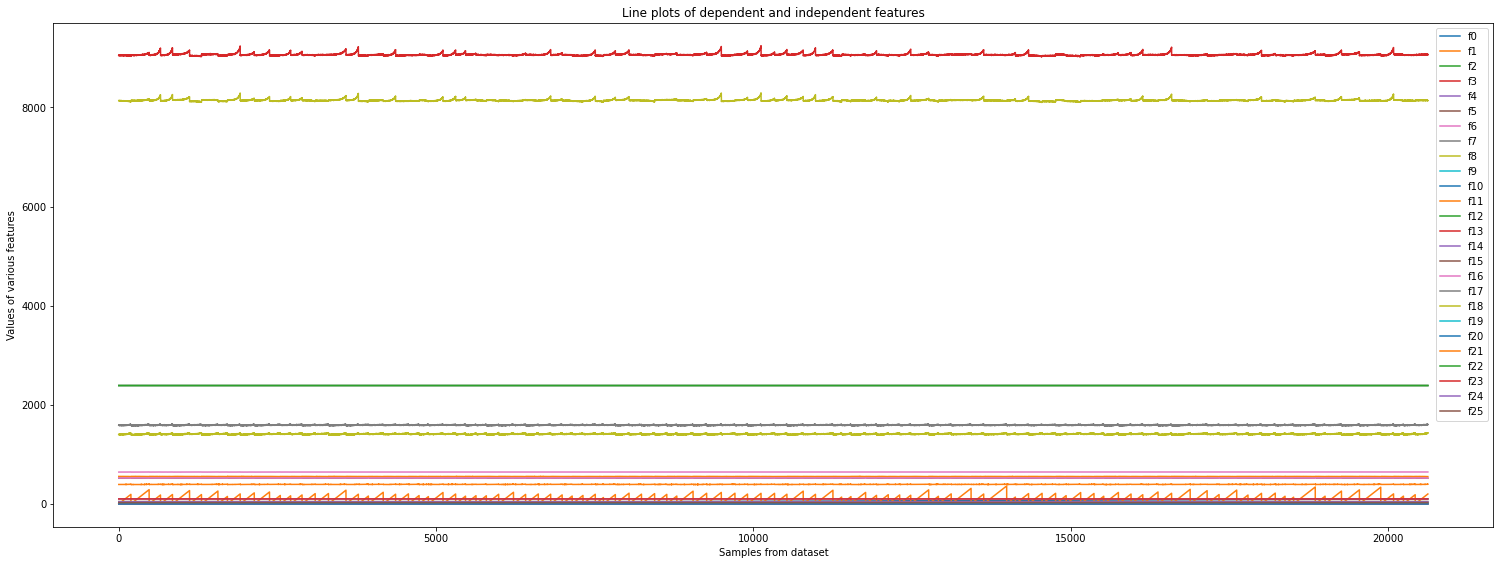

In [ ]:
# Line plots of dependent and independent features
fig = plt.figure(figsize=(20,7))

ax = fig.add_axes([0,0,1,1])
for i in range(0, 26):
  ax.plot(train['f'+str(i)], label='f'+str(i))
# ax.plot(Y['y'], label='y')
ax.set_title('Line plots of dependent and independent features')
ax.legend()
plt.ylabel('Values of various features')
plt.xlabel('Samples from dataset')

Text(0.5, 0, 'Samples from dataset')

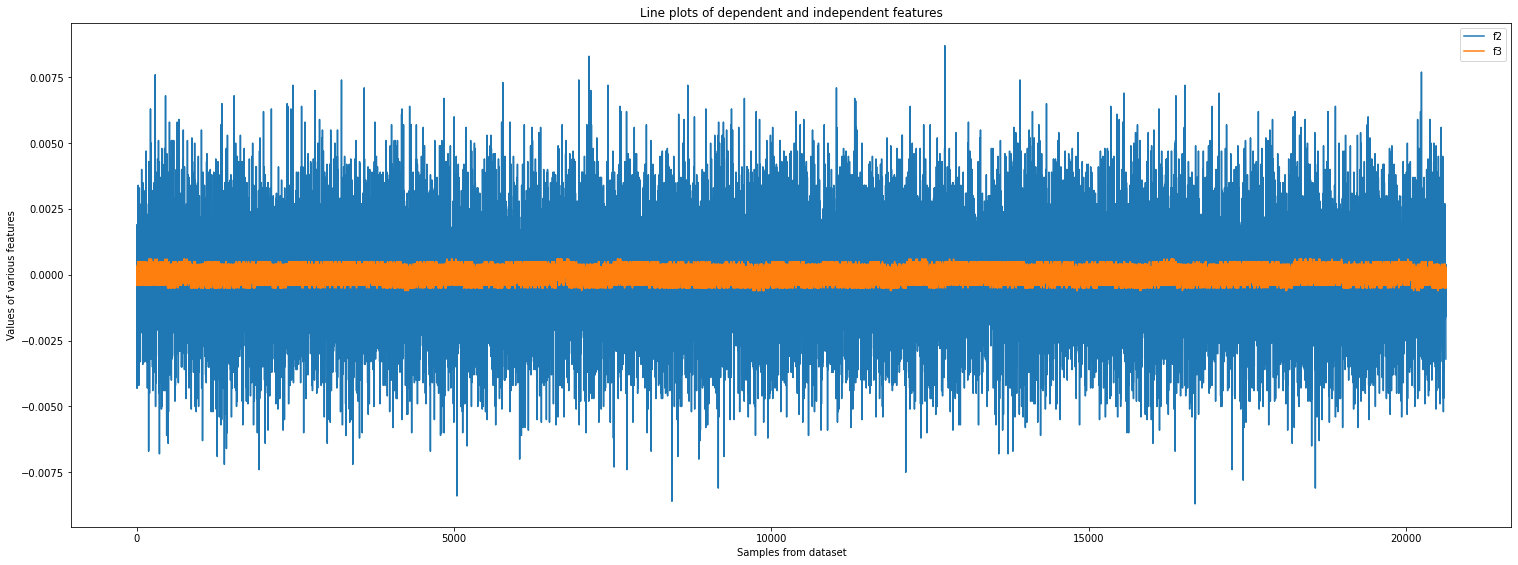

In [ ]:
# Line plots of dependent and independent features
fig = plt.figure(figsize=(20,7))

ax = fig.add_axes([0,0,1,1])
for i in range(2, 4):
  ax.plot(train['f'+str(i)], label='f'+str(i))
# ax.plot(Y['y'], label='y')
ax.set_title('Line plots of dependent and independent features')
ax.legend()
plt.ylabel('Values of various features')
plt.xlabel('Samples from dataset')

In [ ]:
train['f2'].corr(train['f3']) # correlation

0.011660441595286767

Text(0.5, 0, 'Samples from dataset')

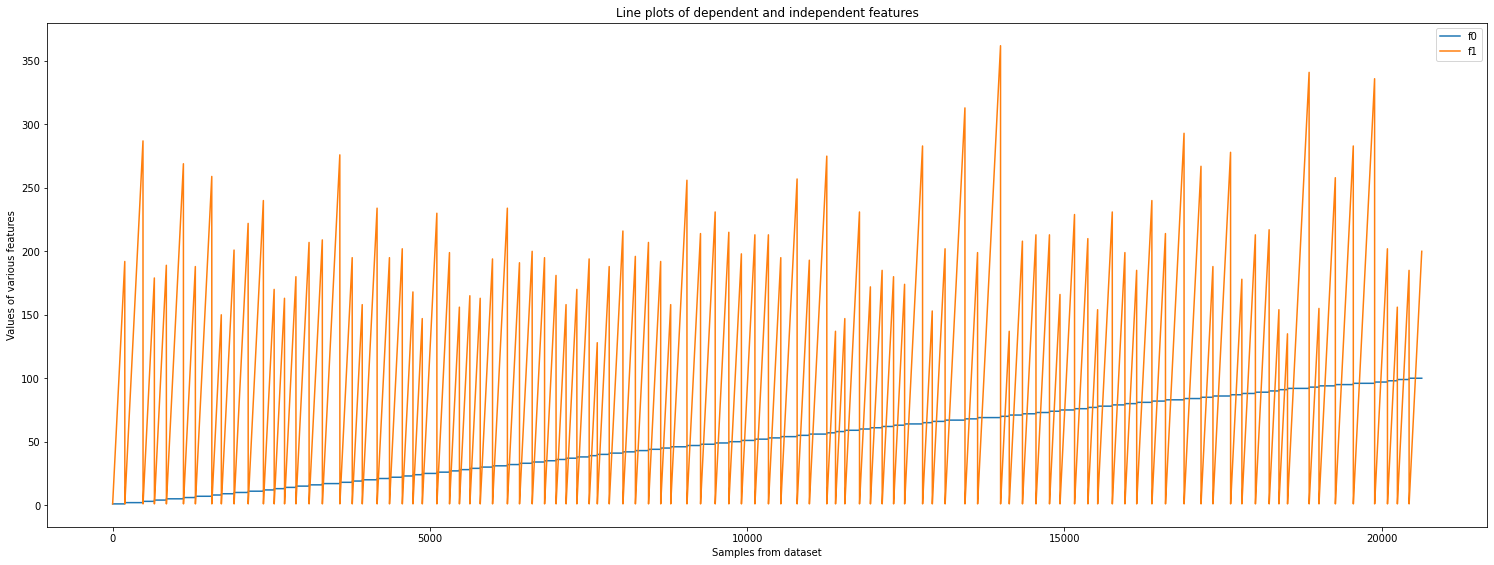

In [ ]:
# Line plots of dependent and independent features
fig = plt.figure(figsize=(20,7))

ax = fig.add_axes([0,0,1,1])
for i in range(0, 2):
  ax.plot(train['f'+str(i)], label='f'+str(i))
# ax.plot(Y['y'], label='y')
ax.set_title('Line plots of dependent and independent features')
ax.legend()
plt.ylabel('Values of various features')
plt.xlabel('Samples from dataset')

In [ ]:
# read the test dataset as dataframe (only the independent features) and clean it
test = pd.read_csv("/content/drive/MyDrive/CMAPSSData/test_FD001.txt", sep=" ", header=None, names=col_names)
test = test.iloc[: , :-2]
print(test.head())
print(test.shape)

   f0  f1      f2      f3     f4      f5      f6       f7       f8     f9  \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...     f16      f17      f18     f19   f20  f21   f22    f23    f24  \
0  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   

       f25  
0  23.3735  
1  23.3916  
2  23.4166  
3  23.3737  
4  23.4130  

[5 rows

In [ ]:
# read the test data as dataframe (only the dependent feature) and clean it
rul_test = pd.read_csv("/content/drive/MyDrive/CMAPSSData/RUL_FD001.txt", sep=" ", header=None, names=['f0', 'f1'])
rul_test = rul_test['f0']
print(rul_test.head())
print(rul_test.shape)

0    112
1     98
2     69
3     82
4     91
Name: f0, dtype: int64
(100,)


In [ ]:
rul_test.isna().sum()

0

In [ ]:
print(rul_test.shape)
print(test.shape)

(100,)
(13096, 26)


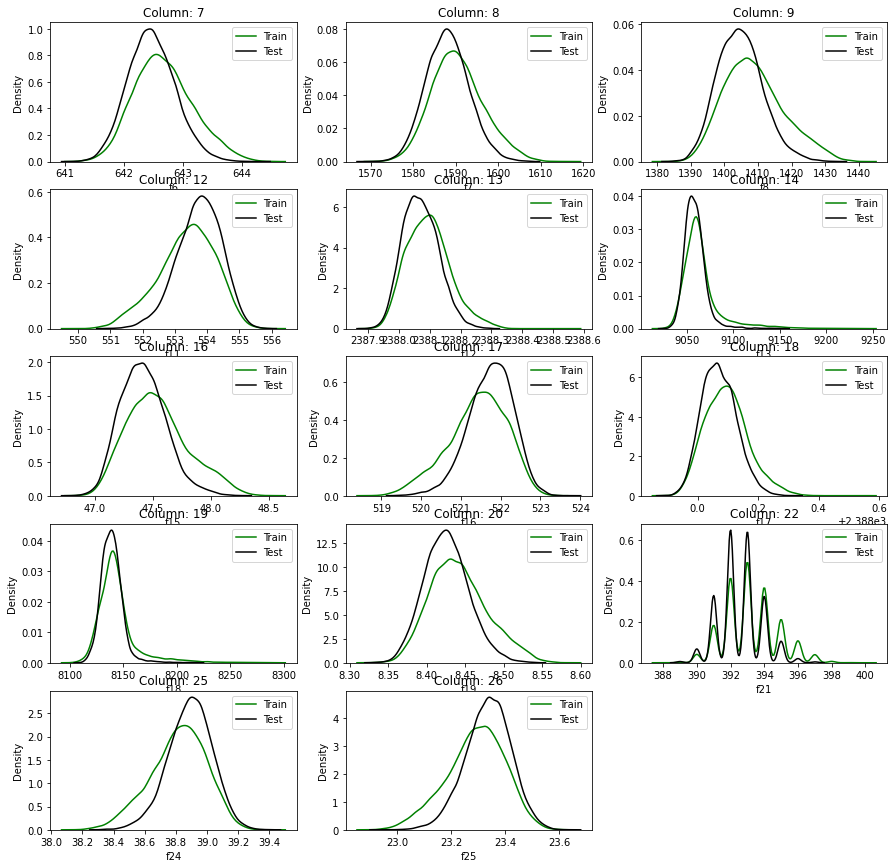

In [ ]:
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = train.iloc[:, j]
    temp_test = test.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "green", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "black", label = "Test")
    plt.title("Column: "+ str(j+1))
    plt.legend()
plt.show()

In [ ]:
# a function to carry out all the preprocessing steps in one go such as deteting operational columns, removing constant columns
def preprpocessing(self, ):
  pass

In [ ]:
# determination of RUL
print(np.unique(train['f0']))
no_of_cycles = train.groupby('f0')['f1'].count()
print(no_of_cycles.values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 135 341 155 258 283 336 202 156 185 200]


In [ ]:
# Add RUL for engine1
RUL = np.arange(no_of_cycles.values[0]-1, -1, -1)
print(RUL)

[191 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174
 173 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156
 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139 138
 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120
 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102
 101 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84
  83  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66
  65  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48
  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30
  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12
  11  10   9   8   7   6   5   4   3   2   1   0]


In [ ]:
# Total engines train data
print(np.unique(train['f0']).shape)
tot_engines = np.unique(train['f0']).shape[0]

(100,)


In [ ]:
# Add RUL column
tot_RUL = []
tot_RUL = np.array(tot_RUL)
for i in range(0, tot_engines):
    RUL = np.arange(no_of_cycles.values[i]-1, -1, -1)
    tot_RUL = np.append(tot_RUL, RUL)
train['y'] = tot_RUL
print(train.tail())

        f0   f1      f2      f3     f4      f5      f6       f7       f8  \
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          f9  ...      f17      f18     f19   f20  f21   f22    f23    f24  \
20626  14.62  ...  2388.26  8137.60  8.4956  0.03  397  2388  100.0  38.49   
20627  14.62  ...  2388.22  8136.50  8.5139  0.03  395  2388  100.0  38.30   
20628  14.62  ...  2388.24  8141.05  8.5646  0.03  398  2388  100.0  38.44   
20629  14.62  ...  2388.23  8139.29  8.5389  0.03  395  2388  100.0  38.29   
20630  14.62  ...  2388.26  8137.33  8.5036  0.03  396  2388  100.0  38.37   

           f25    y  
20626  22.9735  4.0  
20627  23.1594  3.0  
20628  2

In [ ]:
x_test = pd.read_csv('/content/drive/MyDrive/CMAPSSData/test_FD001.txt', sep=" ", header=None)
x_test = x_test.iloc[ : , :-2]
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [ ]:
# read the dataset as dataframe (only the dependent features) and clean the dataset
y_test = pd.read_csv("/content/drive/MyDrive/CMAPSSData/RUL_FD001.txt", sep=" ", header=None)
y_test = y_test.iloc[: , :-1]
y_test.columns = ['y']
y_test.head()

,y
0,112
1,98
2,69
3,82
4,91


#### Common model with common normalization

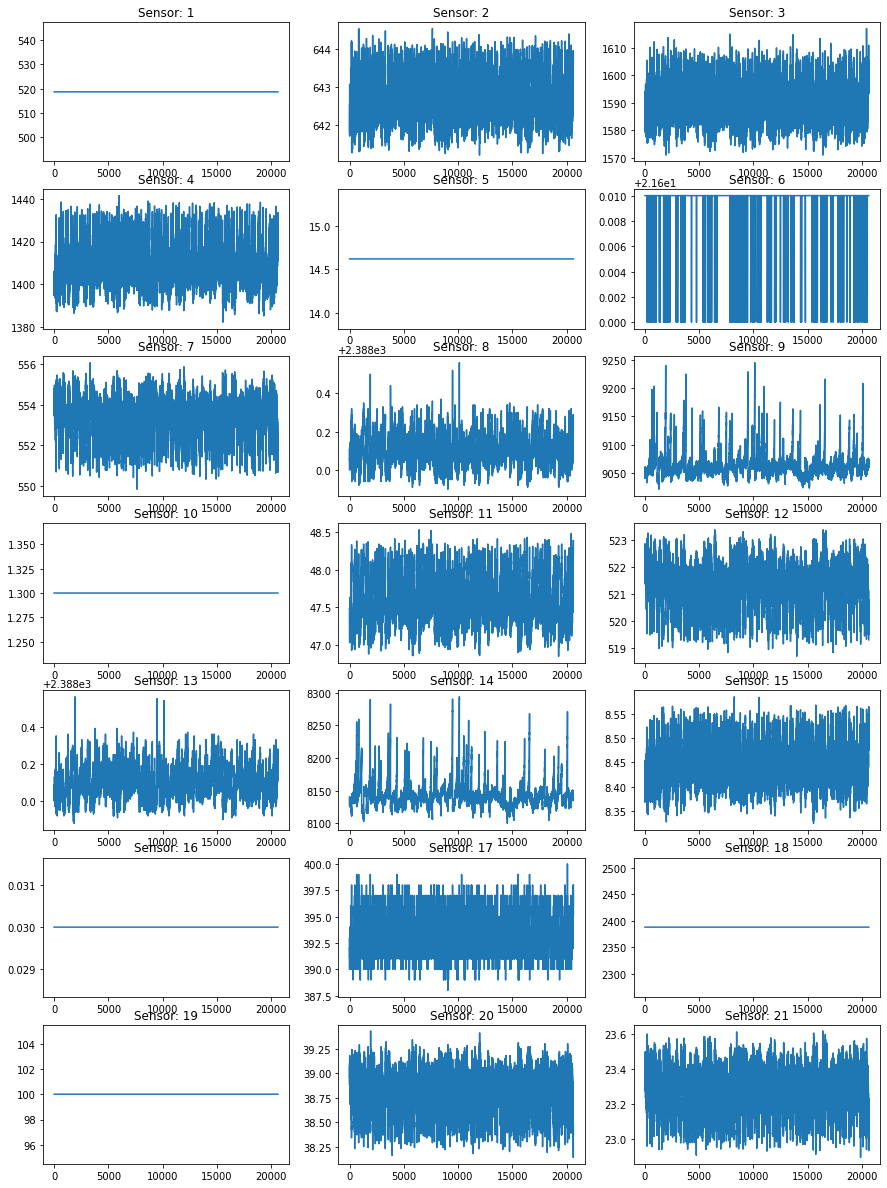

In [ ]:
plt.figure(figsize = (15, 21))
for i in np.arange(5, 26):        # column 5 in python means actual 6th column
    temp = train.iloc[:, i]
    plt.subplot(7,3, i-4)
    plt.plot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.GridSpec(10, 10)
plt.show()

In [ ]:
# drop all the operational parameter columns (since they don't effect RUL value of a machine)
train.drop(['f0', 'f1', 'f2', 'f3', 'f4'], axis=1, inplace=True)
# drop all the constant columns
train.drop(['f5', 'f9', 'f10', 'f14', 'f20', 'f22', 'f23'], axis=1, inplace=True)
train.head()

,f6,f7,f8,f11,f12,f13,f15,f16,f17,f18,f19,f21,f24,f25,y
0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191.0
1,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190.0
2,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189.0
3,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188.0
4,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187.0


In [ ]:
# no of columns are 15 
train.shape

(20631, 15)

In [ ]:
# split data into X, y
X = train.drop(['y'], axis=1)
y = train['y']
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.head())
print(y_train.head())

           f6       f7       f8     f11      f12      f13    f15     f16  \
14054  642.52  1592.28  1415.45  553.40  2388.10  9060.35  47.47  521.58   
19733  643.18  1591.11  1409.34  553.22  2388.06  9052.63  47.48  521.53   
8586   642.43  1588.93  1409.27  553.26  2388.14  9071.84  47.73  521.22   
2582   642.68  1582.58  1412.44  553.58  2388.06  9050.50  47.48  521.86   
13054  643.13  1592.62  1409.10  553.06  2388.16  9060.80  47.75  521.04   

           f17      f18     f19  f21    f24      f25  
14054  2388.08  8141.16  8.4116  394  38.94  23.3304  
19733  2388.06  8137.52  8.4516  394  38.82  23.2967  
8586   2388.14  8146.45  8.4513  393  38.84  23.2356  
2582   2388.07  8132.14  8.4326  392  38.74  23.1862  
13054  2388.16  8139.62  8.4619  395  38.84  23.1605  
14054     75.0
19733    154.0
8586      50.0
2582     126.0
13054     64.0
Name: y, dtype: float64


In [ ]:
# reshape the data
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
# Scale data for all engines
# scaler_Xt = StandardScaler()
# scaler_yt = StandardScaler()
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X_train = scaler_Xt.fit_transform(X_train)
# y_train = scaler_yt.fit_transform(y_train)
# X_test = scaler_X.fit_transform(X_test)
# y_test = scaler_y.fit_transform(y_test)


# tune2

In [ ]:
# scaling method 2
from sklearn.preprocessing import MinMaxScaler
scaler_Xt = MinMaxScaler(feature_range = (0, 1))
scaler_yt = MinMaxScaler(feature_range = (0, 1))
scaler_X = MinMaxScaler(feature_range = (0, 1))
scaler_y = MinMaxScaler(feature_range = (0, 1))
X_train = scaler_Xt.fit_transform(X_train)
y_train = scaler_yt.fit_transform(y_train)
X_test = scaler_X.fit_transform(X_test)
y_test = scaler_y.fit_transform(y_test)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# def build_model():
#     model = Sequential([
#         layers.LSTM(128, input_shape = (1, 14), return_sequences=True, activation = "tanh"),
#         layers.LSTM(64, activation = "tanh", return_sequences = True),
#         layers.LSTM(32, activation = "tanh"),
#         layers.Dense(96, activation = "relu"),
#         layers.Dense(128, activation = "relu"),
#         layers.Dense(1)
#     ])
#     model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
#     return model


# rmse = 41.x : tune1

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# def build_model():
#     model = Sequential([
#         layers.LSTM(128, input_shape = (1, 14), return_sequences=True, activation = "relu"),
#         layers.LSTM(64, activation = "relu", return_sequences = True),
#         layers.LSTM(32, activation = "relu"),
#         layers.Dense(96, activation = "relu"),
#         layers.Dense(128, activation = "sigmoid"),
#         layers.Dense(1)
#     ])
#     model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
#     return model


# rmse = 41.x : tune2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
def build_model():
    model = Sequential([
        layers.LSTM(64, input_shape=(1, 14), activation = "relu"),
        layers.LSTM(128, activation="relu"),
        layers.LSTM(256, activation="relu"),
        layers.LSTM(128, activation = "relu", return_sequences = True),
        layers.LSTM(256, activation="relu"),
        layers.LSTM(512, activation="relu"),
        layers.LSTM(256, activation="relu"),
        layers.LSTM(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.005))
    return model


In [ ]:
X_train.resize(((16504, 1, 14)))
X_test.resize(((4127, 1, 14)))

In [ ]:
model = build_model()
print(model.summary())

ValueError: ignored

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# used the check the maintain the training history of the model

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred

array([[157.5507  ],
       [ 74.02871 ],
       [148.77481 ],
       ...,
       [123.96731 ],
       [ 49.594536],
       [160.79431 ]], dtype=float32)

In [ ]:
y_test = scaler_y.inverse_transform(y_test)
y_test

array([[53132.],
       [32310.],
       [72159.],
       ...,
       [64261.],
       [34464.],
       [50978.]])

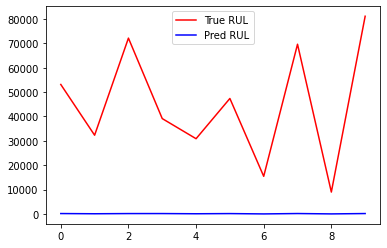

In [ ]:
# Plot true and predicted RUL values
plt.plot(y_test[:10], label = "True RUL", color = "red")
plt.plot(y_pred[:10], label = "Pred RUL", color = "blue")
plt.legend()
plt.show()

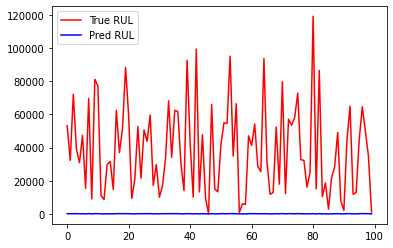

In [ ]:
# Plot true and predicted RUL values
plt.plot(y_test[:100], label = "True RUL", color = "red")
plt.plot(y_pred[:100], label = "Pred RUL", color = "blue")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print((mse(y_pred, y_test))**(1/2))

42.535215541054356


#### Option 2: Model 2 using Random Forest Regressor

In [ ]:
# read the dataset as dataframe (only the independent features) and clean the dataset
train = pd.read_csv("/content/drive/MyDrive/CMAPSSData/train_FD001.txt", sep=" ", header=None, names=col_names)
train = train.iloc[: , :-2]
print(train.head())
print(train.shape)

   f0  f1      f2      f3     f4      f5      f6       f7       f8     f9  \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...     f16      f17      f18     f19   f20  f21   f22    f23    f24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

       f25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [ ]:
# read the test dataset as dataframe (only the independent features) and clean it
test = pd.read_csv("/content/drive/MyDrive/CMAPSSData/test_FD001.txt", sep=" ", header=None, names=col_names)
test = test.iloc[: , :-2]
print(test.head())
print(test.shape)

   f0  f1      f2      f3     f4      f5      f6       f7       f8     f9  \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...     f16      f17      f18     f19   f20  f21   f22    f23    f24  \
0  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   

       f25  
0  23.3735  
1  23.3916  
2  23.4166  
3  23.3737  
4  23.4130  

[5 rows

In [ ]:
# determination of RUL
print(np.unique(train['f0']))
no_of_cycles = train.groupby('f0')['f1'].count()
print(no_of_cycles.values)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 135 341 155 258 283 336 202 156 185 200]


In [ ]:
# Add RUL column
tot_RUL = []
tot_RUL = np.array(tot_RUL)
for i in range(0, tot_engines):
    RUL = np.arange(no_of_cycles.values[i]-1, -1, -1)
    tot_RUL = np.append(tot_RUL, RUL)
train['y'] = tot_RUL
print(train.tail())

        f0   f1      f2      f3     f4      f5      f6       f7       f8  \
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          f9  ...      f17      f18     f19   f20  f21   f22    f23    f24  \
20626  14.62  ...  2388.26  8137.60  8.4956  0.03  397  2388  100.0  38.49   
20627  14.62  ...  2388.22  8136.50  8.5139  0.03  395  2388  100.0  38.30   
20628  14.62  ...  2388.24  8141.05  8.5646  0.03  398  2388  100.0  38.44   
20629  14.62  ...  2388.23  8139.29  8.5389  0.03  395  2388  100.0  38.29   
20630  14.62  ...  2388.26  8137.33  8.5036  0.03  396  2388  100.0  38.37   

           f25    y  
20626  22.9735  4.0  
20627  23.1594  3.0  
20628  2

In [ ]:
# read the test data as dataframe (only the dependent feature) and clean it
rul_test = pd.read_csv("/content/drive/MyDrive/CMAPSSData/RUL_FD001.txt", sep=" ", header=None, names=['f0', 'f1'])
rul_test = rul_test['f0']
print(rul_test.head())
print(rul_test.shape)

0    112
1     98
2     69
3     82
4     91
Name: f0, dtype: int64
(100,)


In [ ]:
# split data into X, y
X = train.drop(['y'], axis=1)
y = train['y']
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.head())
print(y_train.head())

       f0   f1      f2      f3     f4      f5      f6       f7       f8  \
14054  70   62  0.0014 -0.0004  100.0  518.67  642.52  1592.28  1415.45   
19733  96  182  0.0013  0.0005  100.0  518.67  643.18  1591.11  1409.34   
8586   44  142 -0.0050  0.0001  100.0  518.67  642.43  1588.93  1409.27   
2582   13   37 -0.0041  0.0002  100.0  518.67  642.68  1582.58  1412.44   
13054  66  138  0.0006  0.0004  100.0  518.67  643.13  1592.62  1409.10   

          f9  ...     f16      f17      f18     f19   f20  f21   f22    f23  \
14054  14.62  ...  521.58  2388.08  8141.16  8.4116  0.03  394  2388  100.0   
19733  14.62  ...  521.53  2388.06  8137.52  8.4516  0.03  394  2388  100.0   
8586   14.62  ...  521.22  2388.14  8146.45  8.4513  0.03  393  2388  100.0   
2582   14.62  ...  521.86  2388.07  8132.14  8.4326  0.03  392  2388  100.0   
13054  14.62  ...  521.04  2388.16  8139.62  8.4619  0.03  395  2388  100.0   

         f24      f25  
14054  38.94  23.3304  
19733  38.82  23.2967  
85

##### Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfg.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print(mse(y_pred, y_test)**(1/2))

15.521816904738655


In [ ]:
print(y_pred)
print(y_test)

[139.71  82.98 194.05 ... 169.5   69.7  146.96]
8296     148.0
10031     90.0
14957    201.0
82       109.0
18428     86.0
         ...  
4152      15.0
13061     57.0
4385     179.0
4468      96.0
1771     142.0
Name: y, Length: 4127, dtype: float64


###### Using SVM

In [ ]:
from sklearn import svm
svm = svm.SVR()
svm.fit(X=X_train, y=y_train)

SVR()

In [ ]:
y_pred = svm.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print(mse(y_pred, y_test)**(1/2))

69.05259270750676


In [ ]:
print(y_pred)
print(y_test)

[103.24633684 102.44490035 103.62813851 ... 103.67520152 102.73583972
 103.20087283]
8296     148.0
10031     90.0
14957    201.0
82       109.0
18428     86.0
         ...  
4152      15.0
13061     57.0
4385     179.0
4468      96.0
1771     142.0
Name: y, Length: 4127, dtype: float64


#### Using Grid Search CV to find the best params

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Creating a grid of 'to be tuned parameters'.
rs_grid = {'n_estimators' : np.arange(10, 100, 10), 
           'max_samples' : [10000],
           'min_samples_split' : np.arange(2, 20, 2), 
           'min_samples_leaf' : np.arange(1, 20, 2),
           'max_features' : [0.5, 'auto', 'sqrt'], 
           'max_depth' : [None, 3, 5, 10]}
# Instantiate our RandomSearchCV
reg = RandomForestRegressor(n_jobs = -1, random_state = 42)
rs_rf = RandomizedSearchCV(reg, 
                       param_distributions = rs_grid, 
                       cv = 5, 
                       n_iter = 2, 
                       verbose = 2)
# Let us fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   5.7s
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   2.0s
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   3.4s
[CV] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=8, n_estima

In [ ]:
rs_rf.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 70}

In [ ]:
y_pred = rs_rf.predict(X_test)

In [ ]:
y_pred = rfg.predict(X_test)
from sklearn.metrics import mean_squared_error as mse
print(mse(y_pred, y_test)**(1/2))

15.521816904738655


In [ ]:
## Plot feature importance
feature_importance = best_rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]
num_features = X_train.shape[1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), feature_importance[indices],
        color="blue", align="center")
plt.xticks(range(num_features), indices)
plt.xlim([-1, num_features])
plt.xlabel("Feature Columns")
plt.show()

In [ ]:
# use this feature columns to visualise the correlation between the most important features of dataset

#### Option 3: Using SVMs